# Quadratic functional form (Example 1)

### Intro and objectives
#### Understand the application of quadratic functional forms in linear regression models

### In this lab you will learn:
1. examples of quadratic functional forms applied to simple regression models.
2. how to fit simple regression models in Python.


## What I hope you'll get out of this lab
* The feeling that you'll "know where to start" when you need to fit a quadratic regression model.
* How to interpret the results obtained

In [1]:
!pip install wooldridge
import wooldridge as woo
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 17.6 MB/s eta 0:00:00


# Example 1. Salary and Experience



#### To study the relationship between education and salaries, we postulate the simple model:

$ salary=\beta_0+\beta_1*exper+\beta_2*exper^2+u $



### Using the data in WAGE1 where n=526 individuals

In [2]:
salaries = woo.dataWoo('wage1')


In [3]:
salaries.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


In [4]:
salaries.describe()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
count,526.000000,526.000000,526.00000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,...,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,5.896103,12.562738,17.01711,5.104563,0.102662,0.479087,0.608365,1.043726,0.722433,0.250951,...,0.043726,0.287072,0.100760,0.258555,0.366920,0.167300,0.140684,1.623268,473.435361,78.150190
std,3.693086,2.769022,13.57216,7.224462,0.303805,0.500038,0.488580,1.261891,0.448225,0.433973,...,0.204680,0.452826,0.301298,0.438257,0.482423,0.373599,0.348027,0.531538,616.044772,199.434664
min,0.530000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.634878,1.000000,0.000000
25%,3.330000,12.000000,5.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.202972,25.000000,0.000000
50%,4.650000,12.000000,13.50000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.536867,182.500000,4.000000
75%,6.880000,14.000000,26.00000,7.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.750000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.928619,676.000000,49.000000
max,24.980000,18.000000,51.00000,44.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.218076,2601.000000,1936.000000


In [5]:
type(salaries)

pandas.core.frame.DataFrame

In [6]:
# We impose a simple, linear, model:
# We specify CeoSalaries as the empirical dataset

reg = smf.ols(formula='wage ~ exper+np.power(exper,2)', data=salaries)

In [7]:
# We fit the model
results = reg.fit()


In [8]:
b = results.params
print(f'b: \n{b}\n')

b: 
Intercept             3.725406
exper                 0.298100
np.power(exper, 2)   -0.006130
dtype: float64



## Based on the previous we have fitted the following model:

$ wage=3.73+0.2981*exper-0.0061*exper^2+u $


## How do we interpret the equation?

#### This estimated equation implies that exper has a diminishing effect on wage

#### The first year of experience is worth roughly 30¢ per hour (0.298 dollars. The second year of experience is worth less (0.298*2-.0061*1 =.286), or 28¢ per hour.

#### In going from 10 to 11 years of experience, wage is predicted to increase by about (0.298*10-.0061*100 =.176), or 17.6¢. And so on.

<Axes: xlabel='exper', ylabel='wage'>

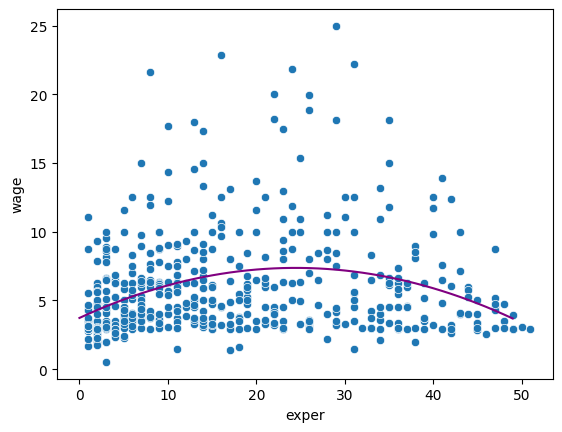

In [10]:
sns.scatterplot(data=salaries, x='exper',y='wage')


experienceValues=[item for item in range(0,50,1)]

yHat=[(3.73+0.2981*item-0.0061*item*item) for item in range(0,50,1)]

sns.lineplot( yHat,color='purple')


#### We observe from the previous graph that the model is non-linear as expected given the non-linear component we specified.
#### We observe that the fitted model exhibits diminishing returns on experience and even becomes negative at around 22 years of experience. This behaviour might be inconsistent or inaccurate, it would need further analysis.